# Kmeans - Aprendizagem Não-Supervisionada

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## Filmes - Segmentação
Disponível em: https://www.kaggle.com/tmdb

In [2]:
df = pd.read_csv("tmdb_5000_movies.csv")
df.head()
# budget - custo do filme
# revenue - receita do filme

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
print("Número de filmes: ",len(df))

Número de filmes:  4803


In [5]:
len(df.columns)

20

In [4]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

### Cenário 1 - Filmes

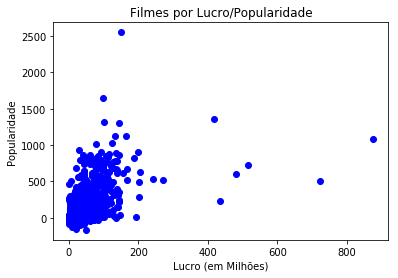

In [6]:
# budget - custo do filme
# revenue - receita do filme
df["lucro"] = (df.loc[:, "revenue"] - df.loc[:, "budget"])/1000000
plt.scatter( df.loc[:, "popularity"],  df.loc[:, "lucro"], 
             c="b")
plt.title("Filmes por Lucro/Popularidade")
plt.xlabel("Lucro (em Milhões)")
plt.ylabel("Popularidade")
plt.show()

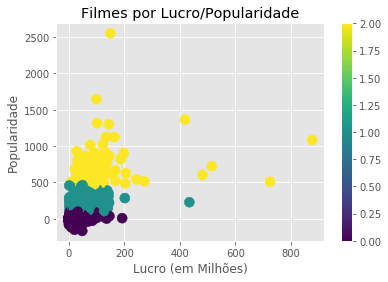

In [7]:
# Clusterização
from sklearn.cluster import KMeans
X = df.loc[:, ["popularity", "lucro"]]
X.head()
y_pred = KMeans(n_clusters=3).fit_predict(X)
df["cluster"] = y_pred
   
matplotlib.style.use("ggplot")

fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter( df.loc[:, "popularity"], df.loc[:, "lucro"], c=df["cluster"], s=100)
plt.title("Filmes por Lucro/Popularidade")
plt.xlabel("Lucro (em Milhões)")
plt.ylabel("Popularidade")
plt.colorbar(scatter)
ax.set_aspect('auto')
#plt.colorbar(label=y_pred)
#plt.legend()

plt.show()

In [8]:
def plot_cluster(df, centroids, xdata_name, ydata_name, title, xlabel, ylabel):

    # Set style of scatterplot
    sns.set_context("notebook", font_scale=1.1)
    sns.set_style("ticks")
    
    # Create scatterplot of dataframe
    sns.lmplot(xdata_name, # Horizontal axis
               ydata_name, # Vertical axis
               data=df, # Data source
               fit_reg=False, # Don't fix a regression line
               hue="cluster")
    
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', 
            linewidths=3,
            color='k',)

    
    # Set title
    plt.title(title)
    # Set x-axis label
    plt.xlabel(xlabel)
    # Set y-axis label
    plt.ylabel(ylabel)
    plt.show()

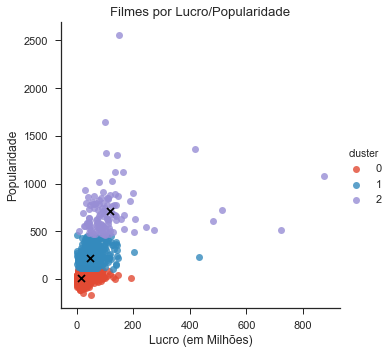

In [9]:
n_clusters = 3
kmeans = KMeans(n_clusters).fit(X)
ypred = KMeans(n_clusters).fit_predict(X)
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids, "popularity", "lucro", title = "Filmes por Lucro/Popularidade", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Popularidade" )

In [ ]:
df.loc[:,["homepage","popularity","lucro", "cluster"]].head()

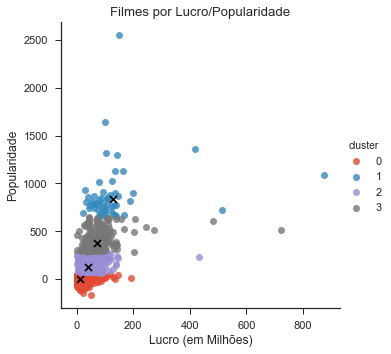

In [10]:
n_clusters = 4
kmeans = KMeans(n_clusters).fit(X)
y_pred = KMeans(n_clusters=4).fit_predict(X)
#ypred = KMeans(n_clusters=4).fit_predict(X)

#y_pred = KMeans(n_clusters=2, random_state=100).fit_predict(X)

df["cluster"] = y_pred

#y_pred = KMeans(n_clusters=3).fit_predict(X)
#df["cluster"] = y_pred


# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids, "popularity", "lucro", title = "Filmes por Lucro/Popularidade", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Popularidade" )

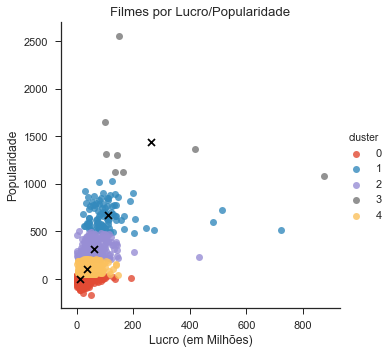

In [11]:
n_clusters = 5
kmeans = KMeans(n_clusters).fit(X)
y_pred = KMeans(n_clusters).fit_predict(X)
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids, "popularity", "lucro", title = "Filmes por Lucro/Popularidade", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Popularidade" )

In [12]:
y_pred[:5]

array([3, 1, 1, 1, 0], dtype=int32)

In [14]:
df.loc[:,["homepage","popularity","lucro", "cluster"]].head()

,homepage,popularity,lucro,cluster
0,http://www.avatarmovie.com/,150.437577,2550.965087,3
1,http://disney.go.com/disneypictures/pirates/,139.082615,661.000000,1
2,http://www.sonypictures.com/movies/spectre/,107.376788,635.674609,1
3,http://www.thedarkknightrises.com/,112.312950,834.939099,1
4,http://movies.disney.com/john-carter,43.926995,24.139100,0


### Predição de novos dados

In [15]:
y_pred = KMeans(n_clusters, random_state=0).fit(X)
df["cluster"] = y_pred.labels_
df.loc[:,["homepage","popularity","lucro", "cluster"]].head()

,homepage,popularity,lucro,cluster
0,http://www.avatarmovie.com/,150.437577,2550.965087,3
1,http://disney.go.com/disneypictures/pirates/,139.082615,661.000000,1
2,http://www.sonypictures.com/movies/spectre/,107.376788,635.674609,1
3,http://www.thedarkknightrises.com/,112.312950,834.939099,1
4,http://movies.disney.com/john-carter,43.926995,24.139100,0


In [16]:
y_pred = KMeans(n_clusters, random_state=0).fit_predict(X)
df.loc[:,["homepage","popularity","lucro", "cluster"]].head()

,homepage,popularity,lucro,cluster
0,http://www.avatarmovie.com/,150.437577,2550.965087,3
1,http://disney.go.com/disneypictures/pirates/,139.082615,661.000000,1
2,http://www.sonypictures.com/movies/spectre/,107.376788,635.674609,1
3,http://www.thedarkknightrises.com/,112.312950,834.939099,1
4,http://movies.disney.com/john-carter,43.926995,24.139100,0


In [17]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

popularity = 150.437577
lucro = 2550.965087
kmeans.predict([[popularity, lucro], [130, 500], [43,24]])

array([3, 1, 0], dtype=int32)

In [18]:
# centróides
kmeans.cluster_centers_

array([[  12.31165159,    1.96210224],
       [ 110.70365888,  672.66544345],
       [  60.62386961,  311.71669891],
       [ 261.36609725, 1438.4611275 ],
       [  36.1848236 ,  109.13415221]])

In [19]:
kmeans.labels_

array([3, 1, 1, ..., 0, 0, 0], dtype=int32)

In [20]:
len(kmeans.labels_)

4803

In [21]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,lucro,cluster
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550.965087,3
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661.000000,1
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,635.674609,1
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,834.939099,1
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,24.139100,0


In [22]:
df[df["cluster"]==4].head(7)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,lucro,cluster
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400,121.081192,4
15,225000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",NaN,2454,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,53.978602,"[{""name"": ""Walt Disney"", ""id"": 5888}, {""name"":...",...,419651413,150.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,6.3,1630,194.651413,4
21,200000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.robinhoodthemovie.com/,20662,"[{""id"": 4147, ""name"": ""robin hood""}, {""id"": 43...",en,Robin Hood,When soldier Robin happens upon the dying Robe...,37.668301,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...",...,310669540,140.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"Rise and rise again, until lambs become lions.",Robin Hood,6.2,1398,110.669540,4
23,180000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.goldencompassmovie.com/index_german...,2268,"[{""id"": 392, ""name"": ""england""}, {""id"": 1461, ...",en,The Golden Compass,"After overhearing a shocking secret, precociou...",42.990906,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...",...,372234864,113.0,"[{""iso_639_1"": ""is"", ""name"": ""\u00cdslenska""},...",Released,There are worlds beyond our own - the compass ...,The Golden Compass,5.8,1303,192.234864,4
27,209000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,44833,"[{""id"": 1721, ""name"": ""fight""}, {""id"": 4410, ""...",en,Battleship,"When mankind beams a radio signal into space, ...",64.928382,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,303025485,131.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Battle for Earth Begins at Sea,Battleship,5.5,2114,94.025485,4
43,200000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",https://www.warnerbros.com/terminator-salvation,534,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Terminator Salvation,"All grown up in post-apocalyptic 2018, John Co...",71.862892,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,371353001,115.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The End Begins.,Terminator Salvation,5.9,2463,171.353001,4
50,150000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/princeofpe...,9543,"[{""id"": 1241, ""name"": ""persia""}, {""id"": 1965, ...",en,Prince of Persia: The Sands of Time,A rogue prince reluctantly joins forces with a...,62.169881,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,335154643,116.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Defy the Future,Prince of Persia: The Sands of Time,6.2,2317,185.154643,4


### Cenário 2 - Filmes

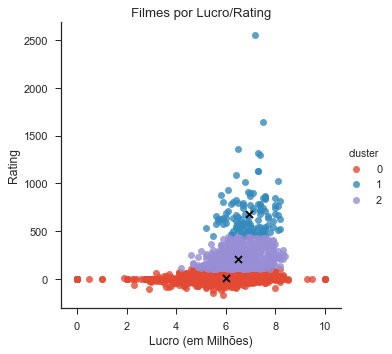

In [23]:
Xx = df.loc[:, ["vote_average", "lucro"]]
n_clusters = 3
kmeans = KMeans(n_clusters).fit(Xx)
y_pred = kmeans.labels_
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids,   "vote_average", "lucro", title = "Filmes por Lucro/Rating", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Rating" )

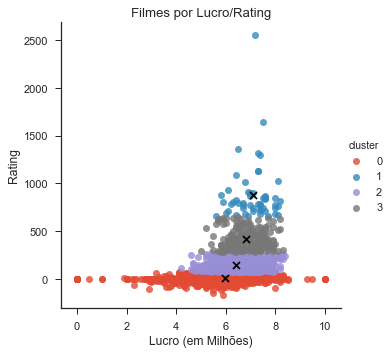

In [24]:
Xx = df.loc[:, ["vote_average", "lucro"]]
n_clusters = 4
kmeans = KMeans(n_clusters).fit(Xx)
y_pred = kmeans.labels_
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids,   "vote_average", "lucro", title = "Filmes por Lucro/Rating", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Rating" )

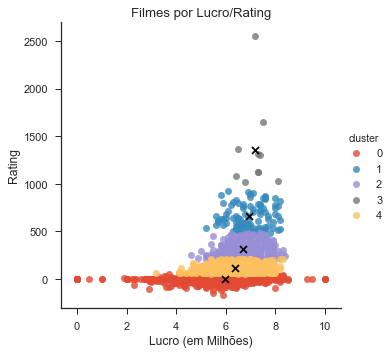

In [25]:
Xx = df.loc[:, ["vote_average", "lucro"]]
n_clusters = 5
kmeans = KMeans(n_clusters).fit(Xx)
y_pred = kmeans.labels_
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids,   "vote_average", "lucro", title = "Filmes por Lucro/Rating", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Rating" )

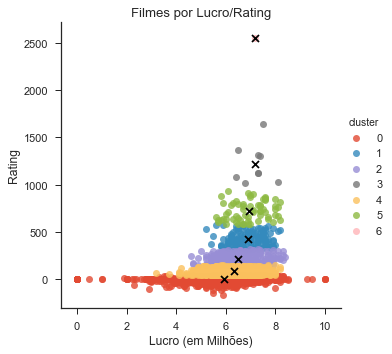

In [26]:
Xx = df.loc[:, ["vote_average", "lucro"]]
n_clusters = 7
kmeans = KMeans(n_clusters).fit(Xx)
y_pred = kmeans.labels_
df["cluster"] = y_pred
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plot_cluster(df, centroids,   "vote_average", "lucro", title = "Filmes por Lucro/Rating", 
             xlabel =  "Lucro (em Milhões)", ylabel = "Rating" )

### Determinando o melhor número de Clusters (Elbow Method)

In [27]:
Ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(Xx).score(Xx) for i in range(len(km))]
print(score)

[-88782462.06841083, -32518151.50464892, -17535827.664999638, -11575184.438201012, -7870680.160514282, -5675593.780777328, -4354971.958868753, -3187328.9614062877, -2587129.5150555903]


In [28]:
range(1,9)

range(1, 9)

In [30]:
score

[-88782462.06841083,
 -32518151.50464892,
 -17535827.664999638,
 -11575184.438201012,
 -7870680.160514282,
 -5675593.780777328,
 -4354971.958868753,
 -3187328.9614062877,
 -2587129.5150555903]

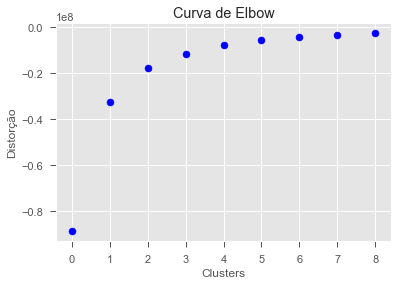

In [32]:
plt.style.use('ggplot')
plt.scatter( list(range(len(score))), score, c="b")
plt.title("Curva de Elbow")
plt.xlabel("Clusters")
plt.ylabel("Distorção")
plt.show()